# Creating a linear model that predicts concrete strength

Hey guys! In this notbook we'll be creating and training a linear model that estimates the strength of concrete.

**A lot of times, don't you just want to know what strength your concrete has, but you only have a computer and no budget for stupid concrete ingredients? Well, here we'll create a simple linear model to determine the strength of concrete using a simpe dataset!!!**

Please download the dataset from this link: https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength

This project will be devided into three sections:

**Section 1**: Processing data

**Section 2**: Training Model

**Section 3**: Creating Answers



## Part 1

In [2]:
#some stuff that we go to inport for everything to work

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split


%matplotlib inline

In [3]:
#get the data from the file
def get_data():
    """
    get_data() -> pandas dataframe

    Description:
    This function will read the data and  and turn its columns into something more readable

    """
    data = pd.read_excel("Concrete_Data.xls")
    cols = {"Cement (component 1)(kg in a m^3 mixture)": "Cement",
             "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "Slag",
               "Fly Ash (component 3)(kg in a m^3 mixture)": "Fly_Ash",
               "Water  (component 4)(kg in a m^3 mixture)":"Water",
               "Superplasticizer (component 5)(kg in a m^3 mixture)": "Super_P",
               "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "Coarse_Agg",
               "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine_Agg",
               "Age (day)": "Age",
               "Concrete compressive strength(MPa, megapascals) ": "Compressive_Strength"
               }
    return data.rename(columns=cols)

In [4]:
original_data = get_data() 
display(original_data.head()) #showing the original data

,Cement,Slag,Fly_Ash,Water,Super_P,Coarse_Agg,Fine_Agg,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:

def preprocess_data(data):
    """
    preprocess_data(data) -> pandas dataframe
    data: the original semi-processed data produced by the get_data() function

    Description:
    In order to make the model train a bit better, we're going to use zscore. 
    In order to calculate the z-score, take the original number, subtract the mean, and then devide the whole thing by its standard deviation
    For each data point in the data, this function will regularize it based on its column.

    """
    new_data = data.copy()
    for column in new_data.columns:
        new_data[column] = stats.zscore(new_data[column])
    return new_data

data = preprocess_data(original_data)
display(data)

,Cement,Slag,Fly_Ash,Water,Super_P,Coarse_Agg,Fine_Agg,Age,Compressive_Strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733,0.507051
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733,-0.277827
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733,-0.725928
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733,-0.182649


In [6]:

def separate_data(data, target):
    """
    separate_data(data, target) -> X_train, X_test, y_train, y_test
    data: the regularized data produced by the preprocess_data() function
    target: the column that we'll try to predict

    Description: We're going to separate the data into stuff that we'll try to predict and stuff that we will be used to
     predict. We're also going to use the train_test_split method to separate the data into training and testing pairs. 
    Even though it's not really that necessary to split the data up when using a linear model, it still can show you
    how accurate you are actually are. 
    """
    X = data.drop(target, axis = 1)
    Y = data[target]
    return train_test_split(X, Y)

X_train, X_test, y_train, y_test = separate_data(data, "Compressive_Strength")
print(f"Shape of the training data: {X_train.shape}")
print(f"Shape of the testing data: {X_test.shape}")
print(f"Shape of labels data {y_train.shape}")

print(y_train.head())

Shape of the training data: (772, 8)
Shape of the testing data: (258, 8)
Shape of labels data (772,)
165    1.849495
615   -0.208911
841   -0.341045
956   -0.736251
248    0.507918
Name: Compressive_Strength, dtype: float64


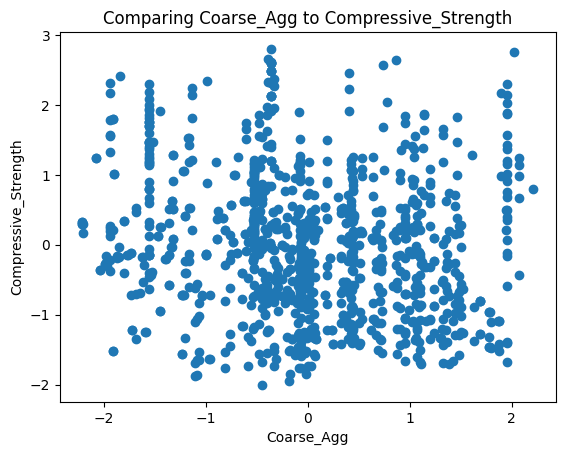

In [7]:
def represent_data(data, x, y):
    """
    represent_data(data, x, y) -> matplotlib dot plot that shows the datapoints based on x, y
    data: the regularized dataframe produced by the preprocess_data() function
    x: the feature that one wants to put on the x_axis
    y: the feature that will be put on the y axis

    Description
    This function will take in take in two features of the dataframe and represent them in a dot plot"""
    plt.scatter(data[x], data[y])
    plt.title(f"Comparing {x} to {y}")
    plt.ylabel(y)
    plt.xlabel(x)
    plt.show()


represent_data(data, "Coarse_Agg", "Compressive_Strength")

In [8]:
data["Fly_Ash"]

0      -0.847132
1      -0.847132
2      -0.847132
3      -0.847132
4      -0.847132
          ...   
1025    0.564569
1026    0.960095
1027    0.850661
1028   -0.847132
1029    0.376967
Name: Fly_Ash, Length: 1030, dtype: float64

## Part 2

**Computing the Cost**

In order to improve the linear model, one has to use a cost function. It tells you how wrong one is.

In [9]:
def generate_random_weights_and_biases(number_of_weights):
    """
    generate_random_weights_and_biases(number_of_weights) -> w (numpy array), b (scalar)
    number_of_weights: an int that represents the number of weights that one needs to represent the model

    Description:
    generate original weights and biasses using the nm.random.uniform() and .random() functions
    """
    w = np.random.uniform(size = number_of_weights)
    b = np.random.random()
    return w, b

In [10]:
w, b = generate_random_weights_and_biases(8)
print(f"Weights: {w}")
print(f"Bias: {b}")

Weights: [0.18816748 0.35501855 0.55791088 0.79385742 0.50913844 0.17847832
 0.05925304 0.92341145]
Bias: 0.5189487504755342


In [11]:
def compute_cost(x, y, w, b):
    """
    compute_cost(x, y, w, b) -> total_cost
    x:the features and data with which you are training the model
    y: the "answers" that one is using, the labels for the data
    w: the weights of the data
    b: the bias

    Description:
    given the weights and biases, along with the testing data,
    use the mean squared error function to calculate the cost
    """

    m = x.shape[0] 
    total_cost = 0
    i = 0
    while i < m:
        total_cost += (np.dot(w, x.iloc[i]) + b - y.iloc[i])**2
        i += 1

    total_cost = total_cost / (2*m)
    
    return total_cost

In [12]:
display(X_train.head())

,Cement,Slag,Fly_Ash,Water,Super_P,Coarse_Agg,Fine_Agg,Age
165,1.376980,0.375760,-0.847132,-1.413262,2.076325,-0.475045,0.375873,0.718062
615,-0.039879,-0.856886,-0.847132,0.441956,-1.038944,-0.063289,1.028509,2.127645
841,0.228175,-0.856886,0.716213,0.676201,0.635932,-0.179095,-0.855776,-0.279733
956,-1.265271,0.506794,0.586456,0.062480,0.150218,-0.251153,0.083871,-0.279733
248,-0.412762,-0.856886,0.624132,0.238632,0.133469,-0.296060,0.916326,0.860604


In [13]:
original_cost = compute_cost(X_train, y_train, w, b)
print(original_cost)

1.0165885626592406


In [14]:
def compute_gradient(x, y, w, b):
    """
    compute_gradient(x, y, w, b) -> gradient for weights, gradient for the bias
    x:the features and data with which you are training the model
    y: the "answers" that one is using, the labels for the data
    w: the weights of the data
    b: the bias

    Description:
    given the weights and bias, along with the data one is using to train the model,
    return the gradients of the weights and biases (the numbers that what one needs to update the model)
    """

    m, n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb = np.dot(x.iloc[i], w) + b

        
        dj_db_i = f_wb - y.iloc[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw[j] += dj_db_i*x.iloc[i][x.columns[j]]
            
    dj_dw /= m
    dj_db /= m

        
    return dj_dw, dj_db

In [15]:
dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)
print(dj_dw, dj_db)


[-0.60721245  0.01363986  0.30342547  0.79496068 -0.35633508 -0.03644754
 -0.29904912  0.67821745] 0.5252676837072165


In [16]:
def gradient_descent(X_train, y_train, X_test, y_test, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    gradient_descent(X_train, y_train, X_test, y_test, w_in, b_in, cost_function, gradient_function, alpha, num_iters) -> ideal weights, ideal bias
    X_train: training data
    y_train: training labels
    X_test: the testing data
    y_test: the testing labels
    w_in: the original weights
    b_in: the origunal bias
    cost_function: the function that one is learning 
    gradient_function: the function that one is using the calculate the gradient
    alpha: the learning rate
    num_iters: number of iterations that gradent will run

    description
    This functions will run gradient descent over a number of iterations. It will slowly adjust the weights and biases, and 
    every 100 iterations, it will return a cost
    """
    w = w_in  #will be bad if one is  modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(X_train, y_train, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i % 100 == 0:
            cost =  cost_function(X_test, y_test, w, b)
            print(f"Cost at iteration {i}: {cost}")

        
    return w, b

In [17]:
learning_rate = 0.01
iterations = 1001

w, b =  gradient_descent(X_train ,y_train, X_test, y_test, w, b, compute_cost, compute_gradient, learning_rate, iterations)

Cost at iteration 0: 1.0257130385555455
Cost at iteration 100: 0.32997594529404556
Cost at iteration 200: 0.24827756833547934
Cost at iteration 300: 0.23054473906764147
Cost at iteration 400: 0.22290050988796684
Cost at iteration 500: 0.21806982949122808
Cost at iteration 600: 0.21468005354562525
Cost at iteration 700: 0.21224938708224975
Cost at iteration 800: 0.21049659533436302
Cost at iteration 900: 0.20922756275714843
Cost at iteration 1000: 0.20830439200985074


## Part 3

In [18]:
def predict_value(cement, slag, fly_ash, water, super_p, coarse_agg, fine_agg, age, w, b):
    """
    predict_value(cement, slag, fly_ash, water, super_p, coarse_agg, fine_agg, age, w, b) -> prediction on concrete strength
    cement: the cement value one wants to use to predict
    slag: the fly_ash value one wants to use to predict
    water: the water value one wants to use to predict
    super_p: the super_p value one wants to use to predict
    coarse_agg: the coarse_agg value one wants to use to predict
    fine_agg: the fine_agg value one wants to use to predict
    age: the age value one wants to use to predict
    w: weights
    b: biases
    """

    p = np.array([cement, slag, fly_ash, water, super_p, coarse_agg, fine_agg, age])
    
    for element, number in zip(p, range(8)):
        p[number] = (element - np.mean(original_data.iloc[:, number]))/np.std(original_data.iloc[:, number])

    prediction = np.dot(w, p) + b

    prediction *= np.std(original_data.iloc[:, 8])
    prediction += np.mean(original_data.iloc[:, 8])

    return prediction




## Example Predictions

We've done it. We've made a half-dfescent linear model which can predict concrete. So have fun playing around!

Feel free to generate your own predicted strengths!!!

In [19]:
predict_value(540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28, w, b)

50.67417629220992

In [20]:

predict_value(540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28, w, b)

51.1837895783302

In [21]:
predict_value(332.5,142.5,0.0,228.0,0.0,932.0,594.0,270, w, b)

56.21027393632106

In [22]:
predict_value(198.6,132.4,0.0,192.0,0.0,978.4,825.5,360, w, b)

59.18815977396149